### Consitution des fichiers pour la segmentation en phrases

In [1]:
import os
import re
import nltk
from nltk.tokenize import sent_tokenize
nltk.download('punkt')
from unidecode import unidecode
import sys
from textblob import Blobber
from textblob_fr import PatternTagger, PatternAnalyzer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


#### Sélectionner les bulletins de la Ville de Bruxelles

In [2]:
infile_path = "../data/txt/"
files = sorted(os.listdir(infile_path))
bxl_corpus = [f for f in files if f.startswith("Bxl_")]
print(f" Mon corpus contient bien les {len(bxl_corpus)} fichiers de la Ville de Bruxelles")

 Mon corpus contient bien les 2677 fichiers de la Ville de Bruxelles


#### Créer le dossier intermédiaire des fichiers retravaillés avant segmentation en phrases

In [3]:
outfile_path = "../data/repl/"
if not os.path.exists(outfile_path):
    os.mkdir(outfile_path)

Fonction intermédiaire pour remettre le contenu de chaque fichier sur une ligne

In [5]:
for file in bxl_corpus:
    with open(os.path.join(outfile_path, file), 'w', encoding="utf-8") as output:
        with open(os.path.join(infile_path, file), encoding="utf-8", errors="backslashreplace") as f:
            for line in f.readlines():
                newline = line.replace("\r", "")
                newline = newline.replace("\n", "") 
                newline = re.sub(" +", " ", newline)
                if not newline.endswith(" "):
                    newline += " "
                output.write(newline)

#### Créer le dossier de destination des fichiers segmentés en phrases

In [6]:
infile_path = "../data/repl/"
outfile_path = "../data/sents/"
if not os.path.exists(outfile_path):
    os.mkdir(outfile_path)

Fonction de segmentation du texte en phrases

In [7]:
for file in bxl_corpus:
    with open(os.path.join(outfile_path, file), 'w', encoding="utf-8") as output:
        with open(os.path.join(infile_path, file), encoding="utf-8", errors="backslashreplace") as f:
            for line in f:
                sentences = sent_tokenize(line)
                for sent in sentences:
                    output.write(sent + "\n")

#### Recherche ciblée en fonction de la thématique

In [8]:
regex = re.compile("|".join(list_of_words))

if regex.search(sentence): ...

NameError: name 'list_of_words' is not defined

In [ ]:
read_corpus = open("../data/bxl.txt").read()
read_corpus[:100]
repl = read_corpus.replace('\n', ' ')
repl[:100]

In [ ]:
input_folder = 
output_folder =

In [17]:
import codecs, re, os
from collections import defaultdict
import sys
import spacy 
from spacy.lang.fr.examples import sentences
nlp = spacy.load('fr_core_news_md')

Déterminer la nouvelle direction vers nos fichiers

In [5]:
infile_path = "../data/sents/"
files = sorted(os.listdir(infile_path))
bxl_files = [f for f in files]
print(f" Mon corpus contient bien mes {len(bxl_files)} fichiers.")

 Mon corpus contient bien mes 2677 fichiers.


Fonction de stockage des lignes d'un fichier

In [6]:
def read_lines(file):
  fin = open(os.path.join(infile_path, file), "r", encoding="utf-8")
  lines = fin.readlines()
  fin.close()
  crp = {}
  i = 0
  for line in lines:
    msg = " ".join(line.split("\t")[0:]).strip()
    crp[i] = {"msg": msg}
    i += 1
  return crp

Fonction de recherche

In [28]:
def search(c):
    out = []
    regex = re.compile("|".join(list_of_words), re.IGNORECASE)
    for i in c:
        linehits = regex.findall(c[i]["msg"])
        if linehits:
            out.append((c[i-1]["msg"] + " " + c[i]["msg"] + " " + c[i+1]["msg"]))
    return out

In [32]:
def entities(hit):
    for sent in hits:
        doc = nlp(sent)
        entities = []
        for ent in doc.ents:
            entities.append(f"{ent.text} ({ent.label_})")
        if entities:
            print(f"\nCet extrait contient les entités suivantes : {', '.join(entities)}")
        else:
            print(f"\nCet extrait ne contient aucune entité nommée")

In [3]:
tb = Blobber(pos_tagger=PatternTagger(), analyzer=PatternAnalyzer())

def get_sentiment(input_text):
    blob = tb(input_text)
    polarity, subjectivity = blob.sentiment
    polarity_perc = f"{100*abs(polarity):.0f}"
    subjectivity_perc = f"{100*subjectivity:.0f}"
    if polarity > 0:
        polarity_str = f"{polarity_perc}% positive"
    elif polarity < 0:
        polarity_str = f"{polarity_perc}% negative"
    else:
        polarity_str = "neutral"
    if subjectivity > 0:
        subjectivity_str = f"{subjectivity_perc}% subjective"
    else:
        subjectivity_str = "perfectly objective"
    print(f"This text is {polarity_str} and {subjectivity_str}.")

In [4]:
re.match(r"^e$", unidecode("é"))

<re.Match object; span=(0, 1), match='e'>

In [5]:
from SPARQLWrapper import SPARQLWrapper, JSON

In [6]:
endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql" 
sparql = SPARQLWrapper(endpoint) 

statement = """
SELECT DISTINCT ?pays ?paysLabel ?gentileLabel WHERE {
    ?pays wdt:P31 wd:Q3624078 .
    ?pays wdt:P1549 ?gentileLabel .
    SERVICE wikibase:label { bd:serviceParam wikibase:language "fr" . }
}
ORDER BY ?paysLabel
"""

sparql.setQuery(statement) 
sparql.setReturnFormat(JSON) 
results = sparql.query().convert()

In [7]:
rows = results['results']['bindings']

pays = []
nationalités = []

for row in rows:
    pays.append(row["paysLabel"]["value"])
    if row["gentileLabel"]["xml:lang"] == "fr":
        nationalités.append(row["gentileLabel"]["value"])

print(f"La lite des {len(set(pays))} pays reprend {len(set(nationalités))} graphèmes différents pour les nationalités.\n")

La lite des 199 pays reprend 454 graphèmes différents pour les nationalités.



In [8]:
pays_nationalités = pays + nationalités
pays_nationalités.append("juif")
pays_nationalités.append("juive")
pays_nationalités.append("musulman")
pays_nationalités.append("palestine")

In [10]:
endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql" 
sparql = SPARQLWrapper(endpoint) 

statement = """
SELECT DISTINCT ?region ?regionLabel ?gentileLabel WHERE {
    ?region wdt:P31 wd:Q15634554 .
    ?region wdt:P1549 ?gentileLabel .
    SERVICE wikibase:label { bd:serviceParam wikibase:language "fr" . }
}
ORDER BY ?regionLabel
"""

sparql.setQuery(statement) 
sparql.setReturnFormat(JSON) 
results = sparql.query().convert()

In [11]:
rows = results['results']['bindings']

régions = []
régionalités = []

for row in rows:
    régions.append(row["regionLabel"]["value"])
    if row["gentileLabel"]["xml:lang"] == "fr":
        régionalités.append(row["gentileLabel"]["value"])

print(f"La lite des {len(set(régions))} pays reprend {len(set(régionalités))} graphèmes différents pour les nationalités.\n")

La lite des 12 pays reprend 21 graphèmes différents pour les nationalités.



In [12]:
pays_nationalités += régions 
pays_nationalités += régionalités

In [13]:
suppr = ["Belgique", "Belge", "République", "État", "du", "de", "Republique", "populaire", "des", "unis", "États", "Nord", "Sud", "Cité", "democratique", "libre"]

words_reg = []
for word in pays_nationalités:
    words = word.split(" ")
    for w in words:
        if w not in suppr:
            words_reg.append(w)
            words_reg = list(set(words_reg))

print(sorted(words_reg))

['Afghan', 'Afghane', 'Afghanistan', 'Afrique', 'Albanais', 'Albanaise', 'Albanie', 'Algérie', 'Algérien', 'Algérienne', 'Allemagne', 'Allemand', 'Allemande', 'Américain', 'Américaine', 'Andorran', 'Andorrane', 'Andorre', 'Anglais', 'Anglaise', 'Angola', 'Angolais', 'Angolaise', 'Antigua-et-Barbuda', 'Antiguayen', 'Antiguayenne', 'Arabie', 'Argentin', 'Argentine', 'Arménie', 'Arménien', 'Arménienne', 'Arméniens', 'Artsakh', 'Artsakhiote', 'Australie', 'Australien', 'Australienne', 'Autriche', 'Autrichien', 'Autrichienne', 'Azerbaïdjan', 'Azerbaïdjanais', 'Azerbaïdjanaise', 'Bahamas', 'Bahaméen', 'Bahaméenne', 'Bahreïn', 'Bahreïnien', 'Bahreïnienne', 'Bangladais', 'Bangladaise', 'Bangladesh', 'Barbade', 'Barbadien', 'Barbadienne', 'Belize', 'Bhoutan', 'Bhoutanais', 'Bhoutanaise', 'Birman', 'Birmane', 'Birmanie', 'Bissaoguinéen', 'Bissaoguinéenne', 'Biélorusse', 'Biélorussie', 'Bolivie', 'Bolivien', 'Bolivienne', 'Bosnie-Herzégovine', 'Bosnien', 'Bosnienne', 'Botswana', 'Botswanais', 'Bo

https://discuss.codecademy.com/t/how-to-make-text-italic-in-python/24902

Constituer une liste de termes à explorer dans le corpus

In [98]:
list_of_words = [r"\bles étrangers", r"\bles etrangers", r"\bdes étrangers", r"\bdes etrangers"]

In [121]:
list_of_words = ["assimilation", r"\bintegration", r"\bintégration"]

In [183]:
list_of_words = ["immigration", "immigre", "immigrant", r"\bmigration", r"\bmigrant", "exil"]

Appliquer la recherhce à mes fichiers segmentés

In [255]:
def add_value_dict(k, d, v, i):
    if k in d: 
        i = d[k]
        if isinstance(i, set):   
            i.add(v)
        elif isinstance(i, list):  
            i.append(v)
        elif isinstance(i, str):   
            i += str(v)
        elif isinstance(i, int):   
            i += int(v)
        elif isinstance(i, float): 
            i += float(v)
        d[k] = i
        return d

In [414]:
list_of_words = ["immigration", "immigre", "immigrant", r"\bmigration", r"\bmigrant", r"\bles étrangers", r"\bles etrangers", r"\bdes étrangers", r"\bdes etrangers"]

count_years = defaultdict(int)
count_decades = defaultdict(int)
covered_years = set()
files_th_imm = []
crp_imm = defaultdict()
locations = defaultdict(int)
miscellaneous = defaultdict(int)

for file in bxl_files:
    
    # traitement du nom du fichier
    file_name = file
    elems = file.split("_")
    year = elems[1]
    decade = year[:3] + "0s"
    
    # stockage temporaire des lignes du fichier à traiter
    infile = open(os.path.join(infile_path, file), "r", encoding="utf-8")
    lines = infile.readlines()
    infile.close()
    inlines = {}
    i = 0
    for line in lines:
        msg = " ".join(line.split("\t")[0:]).strip()
        inlines[i] = {"msg": msg}
        i += 1
    
    # recherche des termes et constitution du corpus de phrases
    out = []
    regex = re.compile("|".join(list_of_words), re.IGNORECASE)
    for i in inlines:
        linehits = regex.findall(inlines[i]["msg"])
        if linehits:
            target = inlines[i]["msg"]
            tmp = target
            if i > 0:
                avant = inlines[i-1]["msg"]
                tmp = (avant + " " + target)
            if i+1 < len(inlines):
                après = inlines[i+1]["msg"]
                tmp += (" " + après)
            if i+2 < len(inlines)-1:
                apr = inlines[i+2]["msg"]
                tmp += (" " + apr)
            out.append(tmp)
            
    # exploitation des données et enrichissements
    if len(out) > 0:
        covered_years.add(year)
        count_decades[decade] += len(out)
        count_years[year] += len(out)
        files_th_imm.append(file_name)
        
        print(f'\n\033[1m\033[4mIl y a {len(out)} occurence(s) dans le fichier "{file_name}" :\033[0;0m')
        
        for extract in out:
            
            print(f"\n\033[96m{extract}\033[0;0m")
            
            re.match(r"^e$", unidecode("é"))
            regx = re.compile("|".join(words_reg), re.IGNORECASE)
            results = regx.findall(extract)
            if results:
                crp_imm[year] = list()
                for word in results:
                    crp_imm[year].append(word)
            
            # traitement des entités nommées
            doc = nlp(extract)
            loc = set()
            misc = set()
            for ent in doc.ents:
                if ent.label_ == "LOC" and len(ent.text) > 3:
                    loc.add(f"{ent.text} ({ent.label_})")
                    locations[ent.text] += 1
                if ent.label_ == "MISC" and len(ent.text) > 3:
                    misc.add(f"{ent.text} ({ent.label_})")
                    miscellaneous[ent.text] += 1
            if loc or misc:
                if loc:
                    print(f"Cet extrait contient les lieux suivants : {', '.join(loc)}")
                if misc:
                    print(f"Cet extrait contient les entités diverses suivants : {', '.join(misc)}")
            else:
                print(f"Cet extrait ne contient aucune entité nommée")
                
            # analyse des sentiments
            get_sentiment(extract)


Il y a 6 occurence(s) dans le fichier "Bxl_1847_Tome_I1_Part_3.txt" :

Il faut à l'étranger une autorisation pour fixer son domicile en Belgique. A défaut de cette autorisation, i l ne sera que résidant: et le titre ou certificat n'est pas exigé des étrangers qui ne sont que résidans. ! , , M. l'échevin Orts.
Cet extrait contient les lieux suivants : Belgique (LOC)
This text is 22% negative and 30% subjective.

On disait tout à l'heure que dans un règlement i l faut une certaine latitude. C'est le langage que tenaient le gouvernement et ses séides lors des débats sur les pillages de 1851 et dans la discussion de la l o i du 22 septembre 1835 relative au droit d'expulsion des étrangers, l o i que j'ai combattue parce qu'elle place les étrangers sous le régime d'un arbitraire sans limite, au mépris de l'art. 128 de la Constitution. Je ne veux rien d'élastique en matière préventive ou répressive.
Cet extrait ne contient aucune entité nommée
This text is 4% positive and 16% subjective.

I

source : https://corpuslinguisticmethods.wordpress.com/2014/02/14/query-a-text-corpus-with-python/

Logiciel de recherche des occurences : https://www.laurenceanthony.net/software/antconc/

Site intéressant sur l'analyse textuelle des historiens : https://programminghistorian.org/fr/lecons/analyse-corpus-antconc

In [136]:
print(count_decades)
print(len(covered_years))
print(len(files_th))

defaultdict(<class 'int'>, {'1850s': 1, '1860s': 2, '1870s': 4, '1880s': 7, '1890s': 25, '1900s': 4, '1910s': 18, '1920s': 23, '1930s': 79, '1940s': 14, '1950s': 41, '1960s': 35, '1970s': 59})
72
172


In [415]:
print(crp_imm)

defaultdict(None, {'1847': [], '1849': [], '1850': [], '1851': [], '1852': [], '1854': [], '1855': [], '1856': [], '1857': [], '1858': [], '1859': [], '1860': [], '1861': [], '1862': [], '1863': [], '1864': [], '1865': [], '1866': [], '1867': [], '1868': [], '1869': [], '1870': [], '1871': [], '1872': ['Inde'], '1873': [], '1874': [], '1876': ['italie'], '1877': [], '1878': [], '1879': [], '1880': [], '1881': ['Inde'], '1882': [], '1883': [], '1884': [], '1885': [], '1886': [], '1887': [], '1888': [], '1889': [], '1890': [], '1891': [], '1892': [], '1893': [], '1894': [], '1895': ['mali'], '1896': [], '1897': [], '1898': [], '1899': [], '1900': [], '1901': [], '1902': [], '1903': [], '1904': [], '1905': [], '1906': [], '1907': [], '1908': [], '1909': [], '1910': [], '1911': [], '1912': [], '1913': [], '1914': [], '1915': [], '1918': [], '1919': [], '1920': [], '1921': [], '1922': [], '1923': [], '1924': [], '1925': [], '1926': [], '1927': [], '1928': [], '1929': [], '1930': [], '1931':

In [137]:
import matplotlib.pyplot as plt
import numpy as np

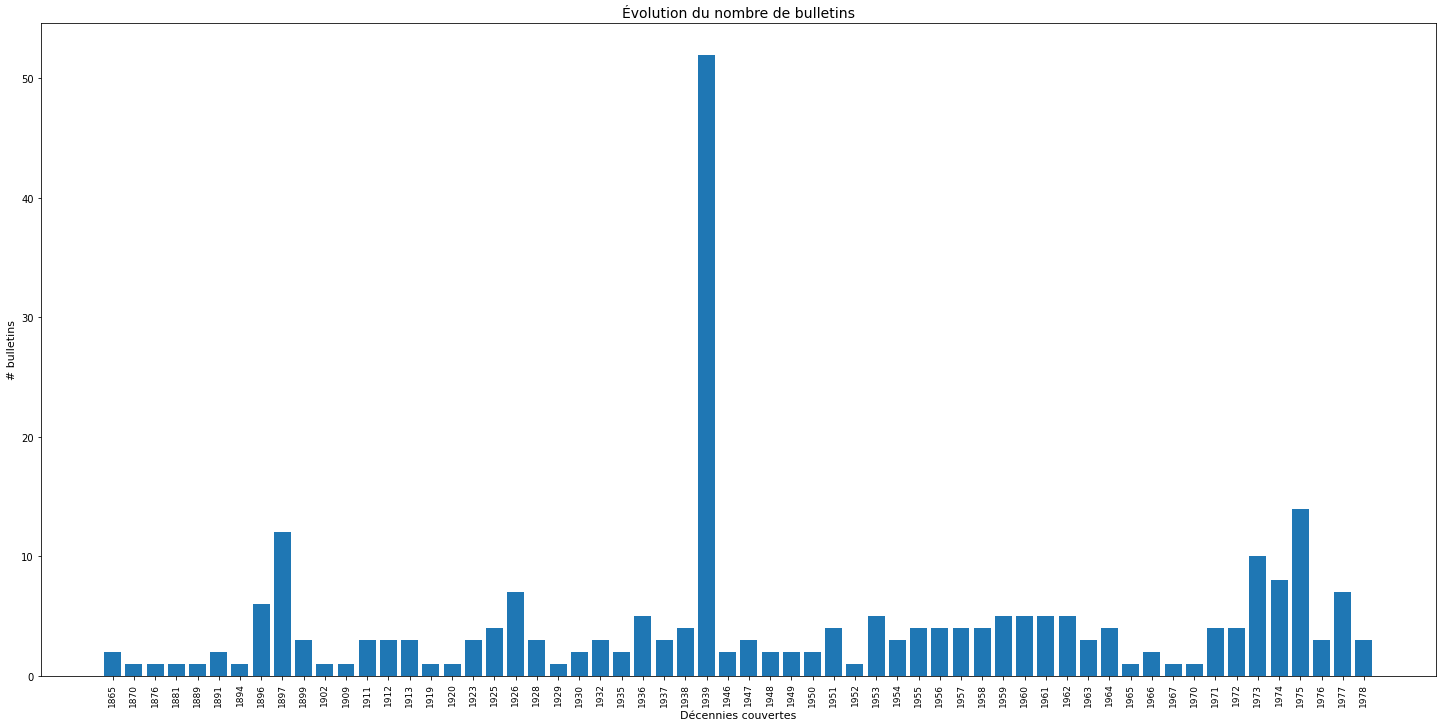

In [322]:
fig = plt.figure(1, figsize=(25, 12))
index = np.arange(len(count_years))
plt.bar(index, count_years.values())
plt.xlabel('Décennies couvertes', fontsize=11)
plt.ylabel('# bulletins', fontsize=11)
plt.xticks(index, count_years.keys(),fontsize=9, rotation=90)
plt.title('Évolution du nombre de bulletins', fontsize=14)
plt.show()

#### Liste de mots plus spécifiques

In [100]:
list_of_words = [r"\bles étrangers", r"\bles etrangers", r"\bdes étrangers", r"\bdes etrangers"]

In [93]:
count_years = defaultdict(int)
covered_years = set()
files_th = []

for file in bxl_files:
    file_name = file
    elems = file_name.split("_")
    year = elems[1]
    
    infile = read_lines(file)
    hits = search(infile)
    
    if len(hits) > 0:
        covered_years.add(year)
        count_years[year] += len(hits)
        files_th.append(file_name)
        print(f'\n\nIl y a {len(hits)} occurence(s) dans le fichier "{file_name}":')
        for hit in hits:
            print(hit)



Il y a 2 occurence(s) dans le fichier "Bxl_1849_Tome_II1_Part_2.txt":
50,501 50 Id. chauffage 9,671 » Gratification pour l'encouragement de l a vaccine. 979 » (La somme de 5,000 franes portée au budget de la bienfaisance de 1849 pour gratification de l a v a c cine payée jusqu'ici en exécution de la résolution d u TS mars 1851, n'a pas été admise p a r le conseil communal ; cette dépense ayant été considérée comme superflue pour l ' a v e n i r , eu égard au d é v e loppement constant de l a vaccine dans cette v i l l e . )
chauffage 9,671 » Gratification pour l'encouragement de l a vaccine. 979 » (La somme de 5,000 franes portée au budget de la bienfaisance de 1849 pour gratification de l a v a c cine payée jusqu'ici en exécution de la résolution d u TS mars 1851, n'a pas été admise p a r le conseil communal ; cette dépense ayant été considérée comme superflue pour l ' a v e n i r , eu égard au d é v e loppement constant de l a vaccine dans cette v i l l e . ) Frais de bandages et c

KeyError: 0

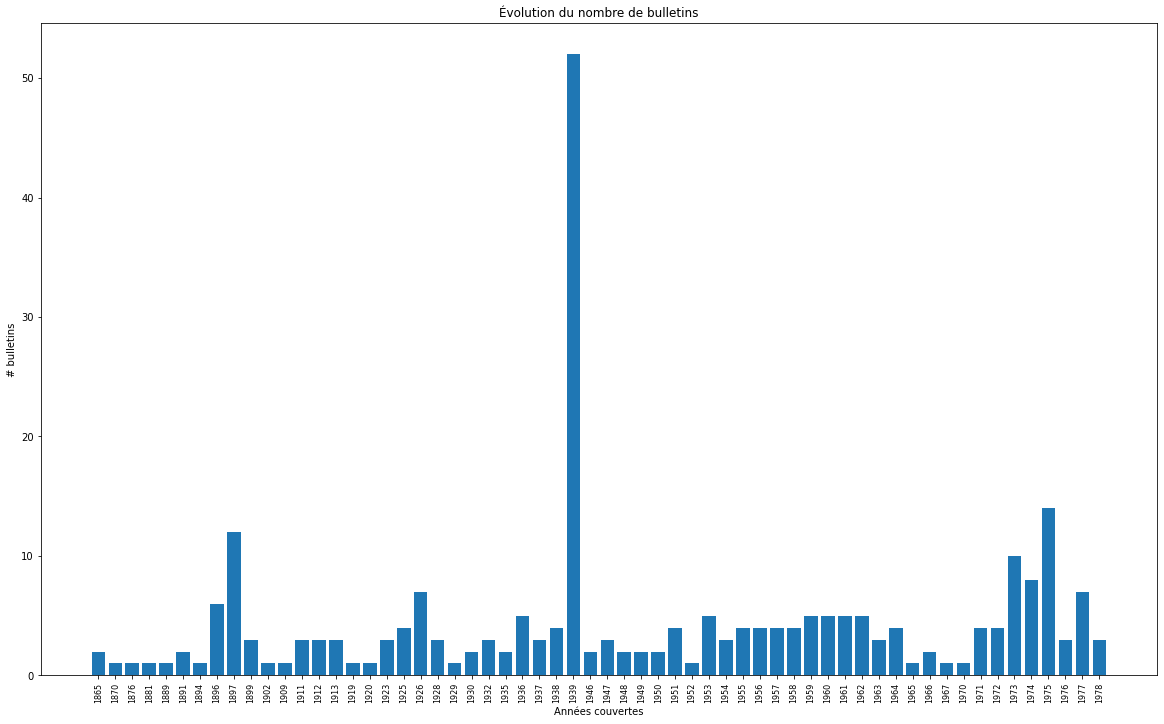

In [16]:
fig = plt.figure(1, figsize=(20, 12))
index = np.arange(len(count_years))
plt.bar(index, count_years.values())
plt.xlabel('Années couvertes')
plt.ylabel('# bulletins')
plt.xticks(index, count_years.keys(),fontsize=8, rotation=90)
plt.title('Évolution du nombre de bulletins')
plt.show()

In [259]:
list_of_words = ["refugie", "réfugié", "réfugie", "refugié"]

In [262]:
count_years = defaultdict(int)
covered_years = set()
files_th = []

for file in bxl_files:
    file_name = file
    elems = file.split("_")
    year = elems[1]
    
    my_file = read_lines(file_name)
    hits = search(my_file)
    
    if len(hits) > 0:
        covered_years.add(year)
        count_years[year] += len(hits)
        files_th.append(file_name)
        print(f'\nIl y a {len(hits)} occurence(s) dans le fichier "{file_name}" à la ligne :')
        for hit in hits:
            print("\t".join(hit))


Il y a 1 occurence(s) dans le fichier "Bxl_1847_Tome_I1_Part_3.txt" à la ligne :
2816	Quelques individus qu'on voulait atteindre se sont réfugiés dans des estaminets, ou on a été les chercher.

Il y a 1 occurence(s) dans le fichier "Bxl_1847_Tome_I1_Part_4.txt" à la ligne :
3441	L'article 274 du Code pénal porte que « toute personne qui aura été trouai vée mendiant dans un lieu pour lequel i l existera un établissement orga« nisé afin d'obvier à la mendicité, sera punie de trois mois d'emprisonne« ment et sera, à l'expiration de sa peine, conduite au dépôt de mendicité, » et l'on a conclu decette disposition que l'action de mendier n'était incriminée qu'autant que le pauvre pouvait se réfugier dans un hospice voisin avant de recourir à la charité des passans; puis, allons plus loin, on a prétendu que les dépôts devaient être à la fois et refuge préventif et maison de répression; on les a ouverts à tous venans.

Il y a 1 occurence(s) dans le fichier "Bxl_1849_Tome_I1_Part_3.txt" à la l

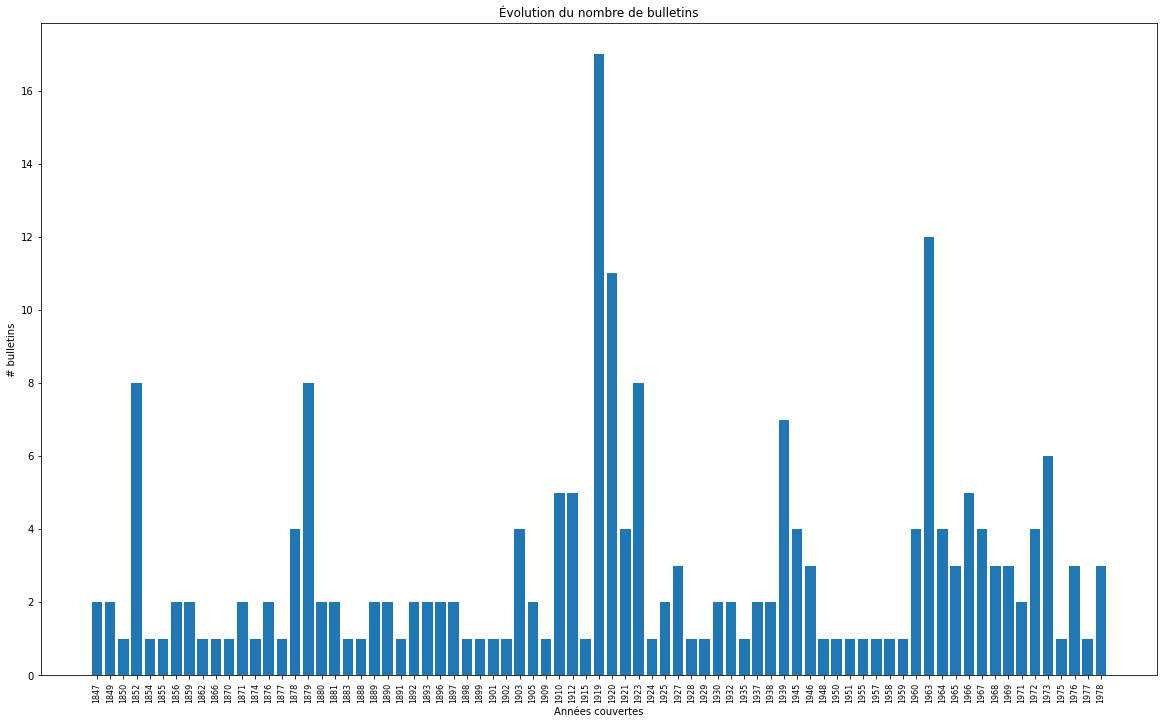

In [263]:
fig = plt.figure(1, figsize=(20, 12))
index = np.arange(len(count_years))
plt.bar(index, count_years.values())
plt.xlabel('Années couvertes')
plt.ylabel('# bulletins')
plt.xticks(index, count_years.keys(),fontsize=8, rotation=90)
plt.title('Évolution du nombre de bulletins')
plt.show()

In [13]:
import string
import collections
from pprint import pprint

from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

import nltk
nltk.download('punkt')
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import wordpunct_tokenize

import pandas as pd

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [14]:
texts = [open(infile_path + f).read() for f in files_th]

In [15]:
texts[127][:400]

'f  \x0cSTAD  JAARLIJKS  BRUSSEL  VERSLAG  VOORGELEGD AAN DE GEMEENTERAAD DOOR H ET C O L L E G E V A N B U R G E M E E S T E R E N S C H E P E N E N in uitvoering van het artikel 70 van de wet van 30 maart 1836  AfWWllli*/N  m.* .\nAdministratie  Hoofdstuk I  Personeel Archieven  a)  Administratie  Gedurende het jaar 1977 heeft de R a a d 52 zitting gehouden, Bovendien zijn er 19 zittingen der varenig'

In [16]:
print(len(texts))

128


In [17]:
def preprocessing(text, stem=True):
    """ Tokenize text and remove punctuation """
    text = text.translate(string.punctuation)
    tokens = word_tokenize(text)
    return tokens

In [18]:
vectorizer = TfidfVectorizer(
    tokenizer=preprocessing,
    stop_words=stopwords.words('french'),
    max_df=0.5,
    min_df=0.1,
    lowercase=True)

In [19]:
%time tfidf_vectors = vectorizer.fit_transform(texts)

CPU times: user 35.9 s, sys: 34.2 ms, total: 35.9 s
Wall time: 35.9 s


In [20]:
essai = vectorizer.get_feature_names_out()

In [21]:
print(essai[5000:5010])

['locale' 'locales' 'localité' 'localités' 'locataire' 'locataires'
 'locatif' 'locations' 'locatives' 'loger']


In [22]:
# vecteur du premier document
pd.Series(
    tfidf_vectors.toarray()[0],
    index=vectorizer.get_feature_names_out()
    ).sort_values(ascending=False)

succession     0.323314
impôt          0.278352
l'honorable    0.238281
l'impôt        0.233565
centimes       0.198136
                 ...   
d'assurer      0.000000
d'articles     0.000000
d'arrêtés      0.000000
d'argent       0.000000
™              0.000000
Length: 8047, dtype: float64

In [181]:
N_CLUSTERS = 5

In [182]:
km_model = KMeans(n_clusters=N_CLUSTERS, random_state = 42)

In [183]:
clusters = km_model.fit_predict(tfidf_vectors)

In [184]:
clustering = collections.defaultdict(list)

for idx, label in enumerate(clusters):
    clustering[label].append(files_th[idx])

In [185]:
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(tfidf_vectors.toarray())

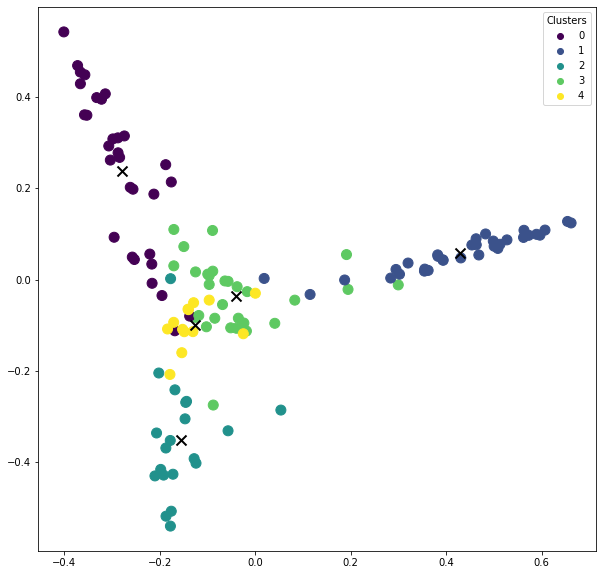

In [186]:
x_axis = reduced_vectors[:, 0]
y_axis = reduced_vectors[:, 1]

plt.figure(figsize=(10,10))
scatter = plt.scatter(x_axis, y_axis, s=100, c=clusters)

# Ajouter les centroïdes
centroids = pca.transform(km_model.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1],  marker = "x", s=100, linewidths = 2, color='black')

# Ajouter la légende
plt.legend(handles=scatter.legend_elements()[0], labels=set(clusters), title="Clusters")

In [187]:
pprint(dict(clustering))

{0: ['Bxl_1876_Tome_II1_Part_3.txt',
     'Bxl_1881_Tome_I2_Part_6.txt',
     'Bxl_1889_Tome_I2_Part_5.txt',
     'Bxl_1896_Tome_I2_2_Part_2.txt',
     'Bxl_1897_Tome_I2_Part_2.txt',
     'Bxl_1899_Tome_I2_Part_6.txt',
     'Bxl_1909_Tome_I2_1_Part_4.txt',
     'Bxl_1911_Tome_I1_Part_6.txt',
     'Bxl_1911_Tome_I2_1_Part_4.txt',
     'Bxl_1912_Tome_I2_1_Part_5.txt',
     'Bxl_1913_Tome_I2_1_Part_5.txt',
     'Bxl_1920_Tome_I2_Part_12.txt',
     'Bxl_1923_Tome_I2_Part_5.txt',
     'Bxl_1925_Tome_II1_1_Part_6.txt',
     'Bxl_1925_Tome_II1_2_Part_7.txt',
     'Bxl_1926_Tome_I2_Part_15.txt',
     'Bxl_1926_Tome_I2_Part_8.txt',
     'Bxl_1926_Tome_II1_Part_15.txt',
     'Bxl_1926_Tome_II1_Part_8.txt',
     'Bxl_1928_Tome_II1_Part_5.txt',
     'Bxl_1929_Tome_II1_Part_5.txt',
     'Bxl_1930_Tome_II1_Part_4.txt',
     'Bxl_1932_Tome_II1_Part_6.txt',
     'Bxl_1935_Tome_II_Part_5.txt',
     'Bxl_1936_Tome_II2_Part_8.txt',
     'Bxl_1937_Tome_II1_Part_3.txt',
     'Bxl_1938_Tome_II_Part_3.txt',


In [188]:
import yake
import textract

In [189]:
clusters_path = os.path.join("../data/clusters/")
if not os.path.exists(clusters_path):
    os.mkdir(clusters_path)

In [190]:
for i in clustering:
    cluster_path = os.path.join("../data/clusters/", str(i))
    if not os.path.exists(cluster_path):
        os.mkdir(cluster_path)
    for f in clustering[i]:
        text = textract.process(os.path.join(infile_path, f))
        with open(os.path.join(cluster_path, f), 'wb') as f: 
            f.write(text) 
    !cat ../data/clusters/{str(i)}/*.txt > ../data/clusters/{str(i)}.txt

In [191]:
!cat ../data/clusters/*.txt > ../data/clusters_all.txt

In [192]:
!wc -m ../data/clusters/clusters_all.txt

wc: ../data/clusters/clusters_all.txt: No such file or directory


#### Extraction des mots-clés sur l'ensemble des clusters

In [193]:
text_clusters = open(os.path.join(f'../data/clusters_all.txt'), 'r').read()

In [194]:
ignored = []

In [195]:
unigr = []
bigr = []
trigr = []

In [196]:
kw_extractor = yake.KeywordExtractor(lan="fr", top=500)
keywords = kw_extractor.extract_keywords(text_clusters.lower())

for kw, score in keywords:
    kword = kw.split()
    if len(kword) == 3:
        trigr.append(kw.lower())
    if len(kword) == 2:
        bigr.append(kw.lower())
    if len(kword) == 1:
        unigr.append(kw.lower())

print(sorted(set(unigr)))
print(sorted(set(bigr)))
print(sorted(set(trigr)))

['aan', 'année', 'années', 'art', 'avis', 'avons', 'belge', 'belges', 'belgique', 'bourgmestre', 'bruxelles', 'budget', "c'est", 'cas', 'collège', 'commission', 'communal', 'communale', 'communales', 'commune', 'communes', 'compte', 'conseil', 'construction', 'cours', 'crédit', "d'autres", "d'un", "d'une", 'dat', 'demande', 'die', 'district', 'dit', 'don', 'droit', 'droits', 'décembre', 'dépense', 'dépenses', 'ecole', 'ecoles', 'een', 'enfants', 'faire', 'favorable', 'fonds', 'frais', 'francs', 'het', 'intervention', "j'ai", 'janvier', 'jour', 'juillet', "l'année", "l'article", "l'echevin", "l'etat", "l'on", 'lieu', 'loi', 'maison', 'maisons', 'mars', 'membre', 'membres', 'messieurs', 'mise', 'monsieur', "n'est", 'nombre', 'nomination', 'octobre', 'part', 'partie', 'pays', 'pensions', 'personnel', 'place', 'plan', 'point', 'police', 'population', 'prix', 'projet', 'proposition', 'public', 'publics', 'publique', 'publiques', "qu'il", "qu'ils", 'quartier', 'question', 'rapport', 'rapport

In [197]:
print(len(unigr))
print(len(bigr))
print(len(trigr))

123
109
268


#### Enrichissement de la liste des mots à ignorer

In [198]:
ignored += unigr
ignored += bigr
ignored += trigr

In [200]:
unigr_0 = []
bigr_0 = []
trigr_0 = []

text_cluster_0 = open(os.path.join("../data/clusters/", "0.txt"), 'r').read()
kw_extractor = yake.KeywordExtractor(lan="fr", top=200)
keywords = kw_extractor.extract_keywords(text_cluster_0.lower())

for kw, score in keywords:
    kword = kw.split()
    if len(kword) == 3 and kw.lower() not in ignored:
        trigr_0.append(kw.lower())
    if len(kword) == 2 and kw.lower() not in ignored:
        bigr_0.append(kw.lower())
    if len(kword) == 1 and kw.lower() not in ignored:
        unigr_0.append(kw.lower())

print(sorted(set(unigr_0)))
print(sorted(set(bigr_0)))
print(sorted(set(trigr_0)))

['ans', 'août', 'archives', 'avril', 'caisse', 'chiffre', 'ci-après', 'cour', 'division', 'décès', 'femmes', 'février', 'général', 'hospices', 'juin', "l'administration", "l'affaire", 'liste', 'listes', 'naissances', 'novembre', 'ouvriers', 'pages', 'paiement', "s'est", 'tableau', 'totaux', 'vente', 'voie']
['bruxelles décès', 'bruxelles venant', 'chiffre électoral', 'division nombre', 'listes électorales', "nombre d'habitants", 'nombre nombre', 'nombre sommes', 'nombre voies', 'novembre décembre', 'octobre novembre', 'septembre octobre', 'sommes nombre', "ville s'est"]
['août septembre octobre', 'assigner la ville', "bruxelles d'un hospice", "bruxelles d'une partie", 'conseil général sollicite', "d'une maison sise", "d'une nouvelle rue", 'district nombre sommes', 'février mars avril', "habitant d'autres communes", 'janvier février mars', 'juillet août septembre', 'juin juillet août', "l'affaire s'est terminée", 'maisons sises rue', 'masculins féminins totaux', "nombre d'habitants nomb

In [201]:
print(len(unigr_0))
print(len(bigr_0))
print(len(trigr_0))

29
14
25


In [202]:
unigr_1 = []
bigr_1 = []
trigr_1 = []

text_cluster_1 = open(os.path.join("../data/clusters/", "1.txt"), 'r').read()
kw_extractor = yake.KeywordExtractor(lan="fr", top=200)
keywords = kw_extractor.extract_keywords(text_cluster_1.lower())

for kw, score in keywords:
    kword = kw.split()
    if len(kword) == 3 and kw.lower() not in ignored:
        trigr_1.append(kw.lower())
    if len(kword) == 2 and kw.lower() not in ignored:
        bigr_1.append(kw.lower())
    if len(kword) == 1 and kw.lower() not in ignored:
        unigr_1.append(kw.lower())

print(sorted(set(unigr_1)))
print(sorted(set(bigr_1)))
print(sorted(set(trigr_1)))

[]
[]
['december van het', 'gemeente van het', 'heer schepen van', 'het mandaat van', 'van deze begroting', 'van een lening', 'van een toelage', 'voor het werkelijk']


In [203]:
print(len(unigr_1))
print(len(bigr_1))
print(len(trigr_1))

0
0
8


In [204]:
unigr_2 = []
bigr_2 = []
trigr_2 = []

text_cluster_2 = open(os.path.join("../data/clusters/", "2.txt"), 'r').read()
kw_extractor = yake.KeywordExtractor(lan="fr", top=200)
keywords = kw_extractor.extract_keywords(text_cluster_2.lower())

for kw, score in keywords:
    kword = kw.split()
    if len(kword) == 3 and kw.lower() not in ignored:
        trigr_2.append(kw.lower())
    if len(kword) == 2 and kw.lower() not in ignored:
        bigr_2.append(kw.lower())
    if len(kword) == 1 and kw.lower() not in ignored:
        unigr_2.append(kw.lower())

print(sorted(set(unigr_2)))
print(sorted(set(bigr_2)))
print(sorted(set(trigr_2)))

['action', 'affaire', 'affaires', 'alimentaires', 'analyses', 'appel', 'caisse', 'classe', 'concessions', 'contrôle', 'cour', "d'assistance", 'demandes', 'demandeur', 'dommages', 'eglise', 'enseignement', 'gaz', 'guerre', 'jugement', 'mai', 'mais', 'militaires', 'paiement', "s'est", 'scolaire', 'scolaires', 'secours', 'statistique', 'surveillance', 'taxe', 'taxes', 'transports', 'vente', 'œuvres']
['affaire terminée', 'affaires militaires', 'affaires électorales', 'classe classe', "cour d'appel", "cours d'adultes", "cours d'éducation", 'cours professionnels', "d'utilité publique", 'denrées alimentaires', 'ecole commerciale', 'ecole ecole', 'ecole normale', 'ecole professionnelle', 'ecoles ecoles', 'ecoles gardiennes', 'ecoles moyennes', 'ecoles normales', 'ecoles primaires', 'enseignement moyen', 'enseignement professionnel', "frais d'entretien", 'fêtes publiques', 'instruction publique', 'jeunes filles', "recouvrement d'une", 'salubrité publique', 'scolaire service', 'scolaires ecoles

In [205]:
print(len(unigr_2))
print(len(bigr_2))
print(len(trigr_2))

35
41
43


In [206]:
unigr_3 = []
bigr_3 = []
trigr_3 = []

text_cluster_3 = open(os.path.join("../data/clusters/", "3.txt"), 'r').read()
kw_extractor = yake.KeywordExtractor(lan="fr", top=200)
keywords = kw_extractor.extract_keywords(text_cluster_3.lower())

for kw, score in keywords:
    kword = kw.split()
    if len(kword) == 3 and kw.lower() not in ignored:
        trigr_3.append(kw.lower())
    if len(kword) == 2 and kw.lower() not in ignored:
        bigr_3.append(kw.lower())
    if len(kword) == 1 and kw.lower() not in ignored:
        unigr_3.append(kw.lower())

print(sorted(set(unigr_3)))
print(sorted(set(bigr_3)))
print(sorted(set(trigr_3)))

['charge', 'charges', 'classe', 'conditions', 'crédits', 'faut', 'finances', 'hospices', 'intérêts', "l'administration", "l'honneur", "l'honorable", 'nom', 'pension', 'proposer', "qu'elle", 'sections', 'serait', 'taxe', 'vente', 'vote', 'écoles']
["c'est qu'il", "d'une proposition", "dit qu'il", "l'echevin coelst", "l'echevin lepage", "l'honorable membre", "qu'il n'est", "qu'il serait", 'recettes ordinaires']
["c'est parce qu'il", "c'est qu'il n'est", "collège a l'honneur", 'compte budget compte', 'mesdames et messieurs', 'nom du collège', 'point de vue', 'section des finances', 'total francs francs', 'ville situé rue']


In [207]:
print(len(unigr_3))
print(len(bigr_3))
print(len(trigr_3))

22
9
10


In [208]:
unigr_4 = []
bigr_4 = []
trigr_4 = []

text_cluster_4 = open(os.path.join("../data/clusters/", "4.txt"), 'r').read()
kw_extractor = yake.KeywordExtractor(lan="fr", top=200)
keywords = kw_extractor.extract_keywords(text_cluster_4.lower())

for kw, score in keywords:
    kword = kw.split()
    if len(kword) == 3 and kw.lower() not in ignored:
        trigr_4.append(kw.lower())
    if len(kword) == 2 and kw.lower() not in ignored:
        bigr_4.append(kw.lower())
    if len(kword) == 1 and kw.lower() not in ignored:
        unigr_4.append(kw.lower())

print(sorted(set(unigr_4)))
print(sorted(set(bigr_4)))
print(sorted(set(trigr_4)))

['actes', 'archives', 'bibliothèque', 'cartes', 'certificats', 'civil', "d'histoire", 'der', 'districts', 'documents', 'dons', 'dossiers', 'décès', 'extrait', 'extraits', 'français', 'féminins', 'historique', 'jean', "l'auteur", "l'étranger", 'lettres', 'liste', 'masculins', 'naar', 'naissances', 'paris', 'radiations', 'registre', 'registres', 'revue', 'royale', 'siècle', 'tome', 'totaux']
['bruxelles bruxelles', 'bruxelles décès', 'bruxelles rapport', 'bruxelles venant', 'commission royale', 'district français', 'district total', 'districts réunis', 'don bruxelles', 'droit masculins', 'décès survenus', 'féminins masculins', 'féminins total', 'geschiedenis van', 'het nummer', 'historique belge', 'hoogte van', 'illégitimes total', 'kant der', "l'etat civil", 'masculins féminins', 'mededelingen van', 'naissances survenues', 'pensions pensions', 'population registre', 'revue belge', 'royale belge', "royale d'histoire", 'services administratifs', 'société royale', 'studie van', 'total masc

In [209]:
print(len(unigr_4))
print(len(bigr_4))
print(len(trigr_4))

35
34
47


In [210]:
bigr = bigr + bigr_0 + bigr_1 + bigr_2 + bigr_3 + bigr_4
trigr = trigr + trigr_0 + trigr_1 + trigr_2 + trigr_3 + trigr_4

In [211]:
print(len(unigr))
print(len(bigr))
print(len(trigr))

123
207
401


In [212]:
print(sorted(set(unigr)))
print(sorted(set(bigr)))
print(sorted(set(trigr)))

['aan', 'année', 'années', 'art', 'avis', 'avons', 'belge', 'belges', 'belgique', 'bourgmestre', 'bruxelles', 'budget', "c'est", 'cas', 'collège', 'commission', 'communal', 'communale', 'communales', 'commune', 'communes', 'compte', 'conseil', 'construction', 'cours', 'crédit', "d'autres", "d'un", "d'une", 'dat', 'demande', 'die', 'district', 'dit', 'don', 'droit', 'droits', 'décembre', 'dépense', 'dépenses', 'ecole', 'ecoles', 'een', 'enfants', 'faire', 'favorable', 'fonds', 'frais', 'francs', 'het', 'intervention', "j'ai", 'janvier', 'jour', 'juillet', "l'année", "l'article", "l'echevin", "l'etat", "l'on", 'lieu', 'loi', 'maison', 'maisons', 'mars', 'membre', 'membres', 'messieurs', 'mise', 'monsieur', "n'est", 'nombre', 'nomination', 'octobre', 'part', 'partie', 'pays', 'pensions', 'personnel', 'place', 'plan', 'point', 'police', 'population', 'prix', 'projet', 'proposition', 'public', 'publics', 'publique', 'publiques', "qu'il", "qu'ils", 'quartier', 'question', 'rapport', 'rapport

#### Préparation d'un liste de stopwords

In [213]:
unigr_tot = unigr

for word in bigr:
    nv = word.split()
    unigr_tot.append(nv[0])
    unigr_tot.append(nv[1])
    
for word in trigr:
    nv = word.split()
    unigr_tot.append(nv[0])
    unigr_tot.append(nv[1])    
    
print(sorted(set(unigr_tot)))

['a', 'aan', 'aangaan', 'aanleg', 'adjudication', 'administratifs', 'advies', 'affaire', 'affaires', 'alimentaires', 'année', 'années', 'août', 'archief', 'archives', 'art', 'artikel', 'asse', 'assigner', 'assistance', 'avis', 'avons', 'bedrag', 'begin', 'begroting', 'beheer', 'belge', 'belges', 'belgique', 'belgië', 'bepalingen', 'beschryving', 'beslissing', 'besluit', 'betrekking', 'bourgmestre', 'bouw', 'bouwen', 'brabant', 'brugge', 'brussel', 'bruxelles', 'budget', 'bulletin', 'bureau', "c'est", 'caisse', 'cas', 'cause', 'centrum', 'chiffre', 'civil', 'classe', 'coelst', 'collège', 'commerciale', 'commissie', 'commission', 'communal', 'communale', 'communales', 'commune', 'communes', 'compte', 'conclusies', 'conseil', 'conseiller', 'construction', 'cour', 'cours', 'crois', 'création', 'crédit', "d'administration", "d'adultes", "d'appel", "d'assistance", "d'autre", "d'autres", "d'eau", "d'entretien", "d'habitants", "d'histoire", "d'hygiène", "d'inspection", "d'orthophonie", "d'un",

In [214]:
sw = stopwords.words("french")

sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout", 
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu"]

sw += unigr_tot

In [215]:
path_cleaned = os.path.join("../data/clusters/cleaned/")
if not os.path.exists(path_cleaned):
    os.mkdir(path_cleaned)

In [216]:
for i in clustering:
    for f in clustering[i]:
        output_path = os.path.join("../data/clusters/cleaned/", str(i))
        if not os.path.exists(output_path):
            os.mkdir(output_path)

In [217]:
for i in clustering:
    for f in clustering[i]:
        cluster_path = os.path.join("../data/clusters/", str(i), f)
        output_path = os.path.join("../data/clusters/cleaned/", str(i), f)
        output = open(output_path, "w", encoding='utf-8')
        with open(cluster_path, encoding='utf-8') as f:
            text = f.read()
            kword = nltk.wordpunct_tokenize(text)
            kept = [w.lower() for w in kword if len(w) > 2 and w.isalpha() and w.lower() not in sw]
            kept_string = " ".join(kept)
            output.write(kept_string)

In [218]:
kw_extractor = yake.KeywordExtractor(lan="fr", top=5)

kw_details_0 = []
for f in clustering[0]:
    text = open(os.path.join("../data/clusters/cleaned/0/", f), 'r').read()
    keywords = kw_extractor.extract_keywords(text.lower())
    for kw, score in keywords:
        kword = kw.split()
        if len(kword) == 3 and kw.lower() not in ignored:
            kw_details_0.append(kw)
            
print(sorted(set(kw_details_0)))

['accepte démission offerte', 'accident survenu agent', 'acte acte acte', 'acte avril légende', 'andré valides invalides', 'anonyme chemins fer', 'ans ans ans', 'appendu acte avril', 'appendu acte chartes', 'appendu acte légende', 'application arrêté mai', 'arrêté mai application', 'arrêté mai arrêté', 'artevelde artevelde artevelde', 'article arrêté royal', 'article autorisation vertu', 'articles hôpital saint', 'association libre compositeurs', 'attribuer dévolution candidats', 'attribués liste liste', 'attribués liste votes', 'banquiers admis changes', 'bourse installations maritimes', 'camions bestiaux ambulances', 'canada etats unis', 'change délégué délégués', 'chemins fer vicinaux', 'chemins fer économiques', 'chevaux automobile chevaux', 'clutinc appendu acte', 'comprenant femmes habitants', 'comptabilité générale eaux', 'construire habitations ouvrières', 'date honneur proposer', 'dommages intérêts raison', 'déclare déclarent déclare', 'déclare déclarent moyenne', 'déclarent d

In [219]:
kw_extractor = yake.KeywordExtractor(lan="fr", top=5)

kw_details_1 = []
for f in clustering[1]:
    text = open(os.path.join("../data/clusters/cleaned/1/", f), 'r').read()
    keywords = kw_extractor.extract_keywords(text.lower())
    for kw, score in keywords:
        kword = kw.split()
        if len(kword) == 3 and kw.lower() not in ignored:
            kw_details_1.append(kw)
            
print(sorted(set(kw_details_1)))

['actuel justification huidig', 'administration théâtre royal', 'afdeling afdeling afdeling', 'akten opgesteld frans', 'aménagement agglomération bruxelloise', 'aménagement expropriation adoption', 'animation parcage voitures', 'animaux observation comparaison', 'ans ans ans', 'appartementen slaapkamer appartementen', 'appel offres restreint', 'application nouveaux barèmes', 'article decide approuver', 'article honneur proposer', 'articles page page', 'assemblée consultative etrangers', 'association but lucratif', 'auprès ministère santé', 'autorisation pose conduites', 'avenue houba strooper', 'avenue versailles prolongée', 'belgische nationaliteit niet', 'blz namen stemming', 'cadastré parcelle numéro', 'canalisations gaz basse', 'centiares cadastré parcelle', 'centre aide sociale', 'centre santé inspection', 'collecteur avenue houba', 'compagnie intercommunale bruxelloise', 'comparaison histoire pittoresque', 'complément objet indirect', 'consultatif bruxellois nationalité', 'consul

In [220]:
kw_extractor = yake.KeywordExtractor(lan="fr", top=5)

kw_details_2 = []
for f in clustering[2]:
    text = open(os.path.join("../data/clusters/cleaned/2/", f), 'r').read()
    keywords = kw_extractor.extract_keywords(text.lower())
    for kw, score in keywords:
        kword = kw.split()
        if len(kword) == 3 and kw.lower() not in ignored:
            kw_details_2.append(kw)
            
print(sorted(set(kw_details_2)))

['académie beaux arts', 'action dommages intérêts', 'action réclamation dommages', 'anderlecht balle pelote', 'appel finalement acquiescé', 'auto camion spécial', 'automobile chevaux automobile', 'avertissements derniers avertissements', 'base journée présence', 'catteau verheven rons', 'catteau verheven waucquez', 'centre mécanographique imprimé', 'chaudière modifier installation', 'chauffage éclairage idem', 'chef dommages guerre', 'chevaux automobile chevaux', 'constituée civile poursuite', 'contagieuses prophylaxie maladies', 'dame victoires sablon', 'deboeck penaranda franchimont', 'demandeur action réclamation', 'desservants paroisses étendant', 'directeur théâtre monnaie', 'dommages guerre afférents', 'dommages guerre domaine', 'dommages intérêts jugement', 'dossier relatif dossier', 'déjà admis majoration', 'eglise saint nicolas', 'eglise victoires sablon', 'garçons garçons garçons', 'garçons mixte garçons', 'guerre afférents immeuble', 'guerre afférents villa', 'heuvel merten 

In [221]:
kw_extractor = yake.KeywordExtractor(lan="fr", top=5)

kw_details_3 = []
for f in clustering[3]:
    text = open(os.path.join("../data/clusters/cleaned/3/", f), 'r').read()
    keywords = kw_extractor.extract_keywords(text.lower())
    for kw, score in keywords:
        kword = kw.split()
        if len(kword) == 3 and kw.lower() not in ignored:
            kw_details_3.append(kw)
            
print(sorted(set(kw_details_3)))

['accepte démission offerte', 'accord finances propose', 'accord honneur proposer', 'achat ornements vases', 'actuel ancien actuel', 'additionnels contribution personnelle', 'adopté articles adoptés', 'ancien actuel ancien', 'ans ans ans', 'antérieurs rendus prénommé', 'approbation autorité supérieure', 'arrêté prince royal', 'arrêté royal mai', 'article adopté articles', 'article arrêté royal', 'articles adoptés chapitre', 'articles hôpital saint', 'autorisation sollicitée pouvoir', 'avenue croix feu', 'aveugles refuge ursulines', 'boulevard emile jacqmain', 'boulevard jardin botanique', 'cahier spécial charges', 'centimes additionnels contribution', 'centimes additionnels succession', 'centre groupe régional', 'charge dépôts mendicité', 'chemin fer américain', 'coopérative intercommunale crémation', 'croix feu avenue', 'date résolu solliciter', 'dispositions présent cahier', 'div habit nés', 'déduction faite concession', 'définitif fonctions professeur', 'dépôt mendicité merxplas', '

In [222]:
kw_extractor = yake.KeywordExtractor(lan="fr", top=5)

kw_details_4 = []
for f in clustering[4]:
    text = open(os.path.join("../data/clusters/cleaned/4/", f), 'r').read()
    keywords = kw_extractor.extract_keywords(text.lower())
    for kw, score in keywords:
        kword = kw.split()
        if len(kword) == 3 and kw.lower() not in ignored:
            kw_details_4.append(kw)
            
print(sorted(set(kw_details_4)))

['académie beaux arts', 'actes rédigés néerlandais', 'arts beaux arts', 'avenue croix feu', 'beaux arts beaux', 'bibliothèque provinciale hasselt', 'boerenkrijg hasselt provinciale', 'boulevard emile bockstael', 'boulevard emile jacqmain', 'bulletins blancs votes', 'chrétien éligibilité effectifs', 'communaux sexe féminin', 'communaux sexe masculin', 'conseils prud hommes', 'croix feu pagodes', 'côté numéros impairs', 'côté numéros pairs', 'divis divis divis', 'effectif comité gardienne', 'exposition universelle internationale', 'feu pagodes croix', 'généraux électeurs généraux', 'histoire palais académies', 'hommes femmes electeurs', 'institut france académie', 'institut rome institut', 'lettres beaux arts', 'masc fém totaux', 'menuiserie plafonnage peinture', 'menuiserie plafonnage plomberie', 'mémoires histoire palais', 'néerlandais annees totaux', 'oneven nummers tussen', 'pagodes croix feu', 'palais académies histoire', 'parti chrétien éligibilité', 'parti libéral éligibilité', 'p